# Model Project 2021: Solow model with economical damage from climate change

The aim of the project is to solve the basic Solow model and then extend the model to account for economical damage from climate change. 

**The project is organized as follows:**

1. Model project description
2. Model description
3. Classic Solow model
4. Extended Solow model (with economical damage from climate change)
5. Conclusion

**Group:** SSTL

**Members:** Louise Otte Arildsen (srb330), Signe Kolind (hmk792), Stine Fürst (qvj635) & Thomas Nielsen (qzw392)

**Imports and set magics:**

In [41]:
import modelproject
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sm
import ipywidgets as widgets

# Model description

$$
\begin{align}
Y_{t}&=[1-D] K_{t}^{\alpha}\left(A_{t} L_{t}\right)^{1-\alpha}, 0<\alpha<1 \\
D&=1-\frac{1}{1+\sigma(\Delta T)^{2}}, \sigma>0 \\
K_{t+1}&=s Y_{t}+(1-\delta) K_{t}, 0<s<1,0<\delta<1, K_{0}>0  \\
A_{t+1}&=(1+g) A_{t}, A_{0}>0  \\
L_{t+1}&=(1+n) L_{t}, L_{0}>0
\end{align}
$$

$$
\tilde{y}_{t} \equiv \frac{Y_{t}}{A_{t} L_{t}}=\frac{y_{t}}{A_{t}} ; \quad \tilde{k}_{t} \equiv \frac{K_{t}}{A_{t} L_{t}}=\frac{k_{t}}{A_{t}}
$$

Equation (1) is a Cobb-Douglas production function, which describes production (Yt) as a function of capital (Kt), population size (Lt), and the level of technology (At). The model assumes that climate changes reduce production with a share D, meaning that a share of the production (DYt) is damaged and can not be used. The share (1-D) of the production can be used for consumption and investment. Equation 2 describes the damage caused by climate change, where \DeltaT measures the temperature change. Equation (3) describes the development of capital, where s is the saving rate and delta is the depreciation rate. Equation (4) and (5) describes how the level of technology (At) and the population size develops over time.

# Classic Solow model (D=0)

When assuming $D=0$ the model reduces to the classic Solow model, which we will solve in this section.

## Analytical solution

The transition equation of the model for capital per effective worker is given by: 

$$
\tilde{k}_{t+1}=\frac{1}{(1+n)(1+g)}\left(s \tilde{k}_{t}^{\alpha}+(1-\delta) \tilde{k}_{t}\right)
$$

Note that convergence requires that $n+g+\delta+ng >0$.

The intuition behind the convergence result is decreasing marginal product on capital and constant depletion/attrition. In steady-state this implies that the savings are just as large as they cover for depreciation and thinning of resources.

First we define all the **symbols** using sympy:

In [42]:
y = sm.symbols('y')
k = sm.symbols('k')
K = sm.symbols('K')
alpha = sm.symbols('alpha')
sigma = sm.symbols('sigma')
deltaT = sm.symbols('delta T')
s = sm.symbols('s')
delta = sm.symbols('delta')
g = sm.symbols('g')
n = sm.symbols('n')

Then we define the **steady state equation**

In [43]:
ss = sm.Eq(k,(s*k**alpha+(1-delta)*k)/((1+n)*(1+g)))

and **solve** it

In [44]:
kss = sm.solve(ss,k)[0]
kss

((delta + g*n + g + n)/s)**(1/(alpha - 1))

For later use, we turn the solution into a **Python funciton**

In [45]:
#transforming the function to a python function
ss_func = sm.lambdify((s,g,n,alpha,delta),kss)

In [46]:
#Defining parameters
s = 0.3
g = 0.02
n = 0.01
alpha = 1/3
delta = 0.05

In [47]:
print(f'analytical solution is: {ss_func(s,g,n,alpha,delta):.3f}')

analytical solution is: 7.235


In steady state the capital per effective worker equals 7.235.

## Numerical solution

We can re-write the equation for the steady state capital per capita as

$$
\tilde{k}_{t+1}-\frac{1}{(1+n)(1+g)}\left(s \tilde{k}_{t}^{\alpha}+(1-\delta) \tilde{k}_{t}\right)=0
$$

whereby it clearly becomes a **root-finding problem**. Such a problem can be solved by various methods. 

In the section below, the problem will be solved from the **brent-** and **bisection method** in order to compare the robustness of our results.


### Bisection Method

In [48]:
def solve_for_ss(s,g,n,alpha,delta):
    """ solve for the steady state level of capital

    Args:
        s (float): saving rate
        g (float): technological growth rate
        n (float): population growth rate
        alpha (float): cobb-douglas parameter
        delta (float): capital depreciation rate 

    Returns:
        result (RootResults): the solution represented as a RootResults object

    """ 
    
    # a. define objective function
    obj_kss = lambda kss: kss - (s*kss**alpha + (1-delta)*kss)/((1+g)*(1+n))

    #. b. call root finder
    result = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='bisect')
    
    return result


#Solve numerically for the steady state:
bisect_solution = solve_for_ss(s,g,n,alpha,delta)
print(f' The numerical solution, calculated from the bisect method is: {bisect_solution.root:}')

 The numerical solution, calculated from the bisect method is: 7.234696712204852


### Brent Method

In [49]:
def solve_for_brent(s,g,n,alpha,delta):
    """ solve for the steady state level of capital

    Args:
        s (float): saving rate
        g (float): technological growth rate
        n (float): population growth rate
        alpha (float): cobb-douglas parameter
        delta (float): capital depreciation rate 

    Returns:
        result (RootResults): the solution represented as a RootResults object

    """ 
    
    # a. define objective function
    obj_kss = lambda kss: kss - (s*kss**alpha + (1-delta)*kss)/((1+g)*(1+n))

    #. b. call root finder
    result = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='brentq')
    
    return result

#Solve numerically for the steady state:
brent_solution = solve_for_brent(s,g,n,alpha,delta)
print(f'The numerical solution, calculated from the brent method, is: {brent_solution.root:}')

The numerical solution, calculated from the brent method, is: 7.234696712205987




When comparing our numerical and analytical results, it is clear that our results are quite robust, only differing by few decimals:

In [50]:
print(f'Analytical solution : {ss_func(s,g,n,alpha,delta):}')
print(f'Bisect solution     : {bisect_solution.root:}')
print(f'Brent solution      : {brent_solution.root:}')


Analytical solution : 7.234696712206231
Bisect solution     : 7.234696712204852
Brent solution      : 7.234696712205987


Because our results seem robust, we choose to rely on a single optimization method, when climate change is introduced from section 4 in the extended model. 

## GDP per effective worker:

From equation 1 we divide both sides with $A_{t}L_{t}$ and obtain the following expression for GDP per effective worker:

$$
\begin{equation*}
\tilde{y}_{t}=\tilde{k}_{t}^\alpha
\end{equation*}
$$

We insert the expression for $\tilde{k}^*=\left(\frac{\delta + gn + g+n}{s}\right)^{\frac{1}{\alpha - 1}}$ found in section 3.1 in $\tilde{k}_{t}$'s  place. 
We then get this expression for GDP per effective worker: 

$$
\tilde{y}^{*}=\left(\frac{s}{n+g+\delta+n g}\right)^{\frac{\alpha}{1-\alpha}}
$$

We calculate $\tilde{y}^{*}$ given our parameter values:

In [51]:
gdp_pr_worker=(s/(n+g+delta+n*g))**(alpha/(1-alpha))
print(f'The GDP per effective worker is: {gdp_pr_worker:.3f}')

The GDP per effective worker is: 1.934


## Simulation of the classic Solow model

We want to simulate the classic Solow model, to show how the models converges to the steady state, $\tilde{k}^*$

This function simulates the classic Solow model for $T=100$ periods.

In [52]:
k0 =1
T = 120
D = 0

In [ ]:
k_path = modelproject.simulate_solow_model(k0,alpha,delta,s,n,g,T,D)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/SigneKolind/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3427, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-53-8e75aa9772b7>", line 1, in <module>
    k_path = modelproject.simulate_solow_model(k0,alpha,delta,s,n,g,T,D)
AttributeError: module 'modelproject' has no attribute 'simulate_solow_model'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/SigneKolind/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2054, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/SigneKolind/opt/anaconda3/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1101, in get_r

This function represents the steady state value:

In [ ]:
k_star = modelproject.find_ssk_k(delta,g,n,alpha,s,D)
k_stars =[k_star for i in range(T)]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



ERROR! Session/line number was not unique in database. History logging moved to new sessionTraceback (most recent call last):
 160
  File "/Users/SigneKolind/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3427, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-53-c79216ee3685>", line 1, in <module>
    k_star = modelproject.find_ssk_k(delta,g,n,alpha,s,D)
AttributeError: module 'modelproject' has no attribute 'find_ssk_k'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/SigneKolind/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2054, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/SigneKolind/opt/anaconda3/li

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



ERROR! Session/line number was not unique in database. History logging moved to new session 161
Traceback (most recent call last):
  File "/Users/SigneKolind/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3427, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-53-2b207e758de3>", line 4, in <module>
    ax.plot(k_path[:T], lw=2, label='Solow path')
NameError: name 'k_path' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/SigneKolind/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2054, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/SigneKolind/opt/anaconda3/lib/python3.8/site-packages/IPython/core/ul

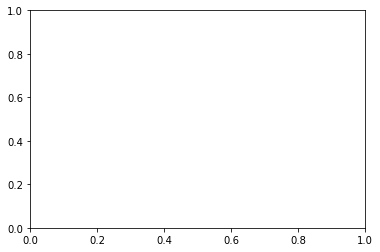

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(k_path[:T], lw=2, label='Solow path')
ax.plot(k_stars,lw=2, label="Steady state")
ax.set_title('Simulated convergence of capital to steady state')
ax.set_xlabel('t')
ax.set_xlabel('Capital per capita')
ax.set_xlim([0,100])
ax.set_ylim([0,10])
ax.legend(loc="lower right")
ax.grid(True);

# The Solow model with economical damage from climate change (D>0)

In this section we consider an extension of the classic Solow model, which includes economical damage from climate change. D represents the reduction in production due to climate change and we now assume that D>0.  

## Analytical solution

Solution:
$$
\tilde{k}_{t+1}=\frac{1}{(1+n)(1+g)}\left(s[1-D] \tilde{k}_{t}^{\alpha}+(1-\delta) \tilde{k}_{t}\right)
$$

Then we define the **steady state equation**

In [13]:
# introducing climate effects
y = sm.symbols('y')
k = sm.symbols('k')
K = sm.symbols('K')
alpha = sm.symbols('alpha')
sigma = sm.symbols('sigma')
deltaT = sm.symbols('delta T')
s = sm.symbols('s')
delta = sm.symbols('delta')
g = sm.symbols('g')
n = sm.symbols('n')
D = sm.symbols('D')

# climate steady state
css = sm.Eq(k,(((s*(1-D)*(k**alpha))+((1-delta)*k)))/((1+n)*(1+g)))

and **solve** it:

In [14]:
kcss = sm.solve(css,k)[0]
kcss

((-delta - g*n - g - n)/(s*(D - 1)))**(1/(alpha - 1))

In [15]:
#transforming the function to a python function
css_func = sm.lambdify((s,g,n,alpha,delta,D),kcss)

In [16]:
#Defining parameters
s = 0.3
g = 0.02
n = 0.01
alpha = 1/3
delta = 0.05
D=0.175
print(f'analytical solution is: {css_func(s,g,n,alpha,delta,D):.3f}')

analytical solution is: 5.421


In steady state the capital per effective worker equals 5.421.

## Numerical solution

In [17]:
def solve_for_css(s,g,n,alpha,delta,D):
    """ solve for the steady state level of capital

    Args:
        s (float): saving rate
        g (float): technological growth rate
        n (float): population growth rate
        alpha (float): cobb-douglas parameter
        delta (float): capital depreciation rate 

    Returns:
        result (RootResults): the solution represented as a RootResults object

    """ 
    
    # a. define objective function
    obj_kcss = lambda kcss: kcss - (s*(1-D)*kcss**alpha + (1-delta)*kcss)/((1+g)*(1+n))

    #. b. call root finder
    result = optimize.root_scalar(obj_kcss,bracket=[0.1,100],method='bisect')
    
    return result



In [18]:
solution_2 = solve_for_css(s,g,n,alpha,delta,D)

print(f'analytical solution is: {css_func(s,g,n,alpha,delta,D):.3f}')
print(f' numerical solution is: {solution_2.root:.3f}')

analytical solution is: 5.421
 numerical solution is: 5.421


## GDP per effective worker with climate change (D = 0.175)

There are different scenarios for the future temperature changes. A scenario with "little CO2 emission" will imply that the global average temperature increases by approx. 1 degree over the next 100 years. The worst case scenario, with "a lot of CO2 emissions", will imply that the global temperature rise at about 4 degrees over the next 100 years. A meta-study by Nordhaus og Moffat (2017) shows that the most pessimistic estimates in the literature suggests that temperature rises of 4 degress are associated with approx. 17.5% loss of production i.e. D = 0.175.

We want to compare the GDP per effective worker in the classic Solow model (D=0) with the GDP per effective in the extended Solow model when the worst possible climate scenario unfolds (D=0.175). We start by calculating the GDP per effecitive worker with D=0.175:

From equation 1 we divide both sides with $A_{t}L_{t}$ and obtain the following expression for GDP per effective worker:

$$
\begin{equation*}
\tilde{y}_{t}=(1-D)\tilde{k}_{t}^\alpha
\end{equation*}
$$

We insert the expression for $\tilde{k}^*=\left(\frac{\delta + gn + g+n}{s(1-D)}\right)^{\frac{1}{\alpha - 1}}$ found in section 4.1 in $\tilde{k}_{t}$'s  place. 
We then get this expression for GDP per effective worker: 

$$
\tilde{y}^{*}=(1-D)^{\frac{1}{1-\alpha}} \left(\frac{s}{n+g+\delta+n g}\right)^{\frac{\alpha}{1-\alpha}}
$$

We calculate $\tilde{y}^{*}$ given our parameter values:

In [53]:
D=0.175
gdp_pr_worker_climate=(1-D)**(1/(1-alpha))*(s/(n+g+delta+n*g))**(alpha/(1-alpha))
print(f'The GDP per effective worker when accounting for climate change is: {gdp_pr_worker_climate:.3f}')

The GDP per effective worker when accounting for climate change is: 1.449
ERROR! Session/line number was not unique in database. History logging moved to new session 162


### Compare GDP per effective worker with the model without climate change

In [54]:
comparison= 1-gdp_pr_worker_climate/gdp_pr_worker
print(f'The reduction in GDP per effective worker when accounting for climate change: {comparison:.3f}')

The reduction in GDP per effective worker when accounting for climate change: 0.251


This imply that GDP per efficient worker decreases by approx. 25 pct. This effect is greater than the initial decline of 17.5 pct. The reason for this difference is due to negative effects via capital accumulation.

In [ ]:
def Solaris(D,alpha,s,n,g,delta):
    return 1-((1-D)**(1/(1-alpha))*(s/(n+g+delta+n*g))**(alpha/(1-alpha)))/(s/(n+g+delta+n*g))**(alpha/(1-alpha))

We create an interactive widget where climate changes reduces the production with a share D and thus also reduces the GDP per effective worker:

In [ ]:
widgets.interact(Solaris, 
                 alpha= widgets.fixed(1/3),
                 s=widgets.fixed(0.3),
                 g=widgets.fixed(0.02),
                 n=widgets.fixed(0.01),
                 delta=widgets.fixed(0.05),
                 D= widgets.FloatSlider(description ='$D$',        
                                        min = 0.0 , max = 1 , step = 0.005, value = 0.17));

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/SigneKolind/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3427, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-55-cfa15e94999f>", line 1, in <module>
    widgets.interact(Solaris,
NameError: name 'Solaris' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/SigneKolind/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2054, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/SigneKolind/opt/anaconda3/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
 

We see that for any given level of D the reduction in GDP per capita is greater than the reduction in production due to the negative affect froms capital accumulation.

## Visulization

**Describe graph**

In [240]:
widgets.interact(modelproject.simulate_basic, 
                k     = widgets.fixed(0), 
                alpha = widgets.FloatSlider(description = '$\u03B1$' , min = 0 ,    max = 0.9 , step = 0.05 , value = 1/3),
                delta = widgets.FloatSlider(description = '$\u03B4$' , min = 0 ,    max = 0.5 , step = 0.01 , value = 0.05),
                s     = widgets.FloatSlider(description = 's' ,        min = 0.01 , max = 0.3 , step = 0.005 , value = 0.3),
                n     = widgets.FloatSlider(description ='$n$',        min = 0.01 , max = 0.1 , step = 0.005, value = 0.01),
                g     = widgets.FloatSlider(description ='$g$',        min = 0.01 , max = 0.1 , step = 0.005, value = 0.02),
                D     = widgets.FloatSlider(description ='$D$',        min = 0.0 , max = 1 , step = 0.005, value = 0),
                K     = widgets.fixed(1),
                T     = widgets.IntSlider(description='$T$' ,          min = 1,     max = 1000, step = 10,    value = 10))

interactive(children=(FloatSlider(value=0.3333333333333333, description='$α$', max=0.9, step=0.05), FloatSlide…

<function modelproject.simulate_basic(k, alpha, delta, s, n, g, K, T, D)>

## Comparison with classic Solow model

# Conclusion

ADD CONCISE CONCLUSION.